
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EffiSciencesResearch/hackathon42/blob/main/starting_pack_hackathon42.ipynb)


In [173]:
# This can take a moment
# Please install git large file system before cloning
!git lfs install
!git clone  --depth=1  https://github.com/EffiSciencesResearch/hackathon42.git

Updated git hooks.
Git LFS initialized.
fatal: destination path 'hackathon42' already exists and is not an empty directory.


In [210]:
%cd /content/hackathon42/hackathon42

import numpy as np
from tqdm.notebook import tqdm
import os
from os.path import join
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

use_cuda = False
device = torch.device("cuda" if use_cuda else "cpu")

datasets_names = sorted(os.listdir(path='datasets2'), key=lambda name: int(name[:2]))
datasets_names = {int(datasets_name.split("_")[0]): datasets_name for datasets_name in datasets_names}
print(datasets_names)

# You can choose the dataset here by modifying the brackets
dataset_name = join('datasets2', datasets_names[2])
#assert "01_mnist_cc" in dataset_name, "This colab is destined for MNIST, and not for the other datasets. The code needs to be adapted :) "
print(dataset_name)

X_labeled = np.load(join(dataset_name, "X_labeled.npy"))
y_labeled = np.load(join(dataset_name, "y_labeled.npy"))
X_unlabeled = np.load(join(dataset_name, "X_unlabeled.npy"))
X_val = np.load(join(dataset_name, "X_val.npy"))


X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled)


X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device)
y_test = torch.tensor(y_test, device=device)

/content/hackathon42/hackathon42
{0: '00_toy_dataset', 1: '01_mnist_cc', 2: '02_mnist_constant_image', 3: '03_mnist_constant_image_random_row', 4: '04_mnist_uniform_color_random_row', 5: '05_mnist_uniform_color_low_mix_rate', 6: '06_mnist_sum', 8: '08_mnist_sum_noise_level', 12: '12_mnist_mysterious', 13: '13_mnist_mysterious', 23: '23_mnist_embed', 456: '456_mnist_embed', 888: '888_vehicle_animal', 999: '999_humans'}
datasets2/02_mnist_constant_image


In [243]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1000),
            nn.ReLU(),
            nn.Linear(1000, 800),
            nn.ReLU(),
            nn.Linear(800, 300),
            nn.ReLU(),
            nn.Linear(300, 200),
            nn.ReLU(),
            nn.Linear(200, 3),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(self.flatten(x[:,:,:,:28]))
        return logits
net = NeuralNetwork().to(device)

In [244]:
import pandas as pd

tbatch = 100
nb_epochs = 20

nbbatchs = int(X_train.shape[0]/tbatch)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

net.train()

def evaluate(X_test):
    net.eval()
    with torch.no_grad():
        y_pred = net(X_test)
    correct_test = (torch.argmax(y_pred, axis=1) == y_test).sum().item()
    net.train()
    return correct_test/len(X_test)

for epoch in tqdm(range(nb_epochs)):  # loop over the dataset multiple times
    correct = 0
    for i in (range(nbbatchs)):
        
        optimizer.zero_grad()
        
        X_batch = X_train[i*tbatch:(i+1)*tbatch]
        y_batch = y_train[i*tbatch:(i+1)*tbatch]

        # Compute forward / backward
        y_pred = net(X_batch)
        correct += (torch.argmax(y_pred, axis=1) == y_batch).sum().item()

        loss = criterion(y_pred, y_batch)
        

        loss.backward()
        optimizer.step()
        # break
    print("acc train:", correct/X_train.shape[0], "acc test:", evaluate(X_test))




  0%|          | 0/20 [00:00<?, ?it/s]

acc train: 0.45230078563411896 acc test: 0.5185185185185185
acc train: 0.6980920314253648 acc test: 0.9595959595959596
acc train: 0.8709315375982043 acc test: 0.9562289562289562
acc train: 0.8742985409652076 acc test: 0.9932659932659933
acc train: 0.8765432098765432 acc test: 0.9831649831649831
acc train: 0.8866442199775533 acc test: 0.9932659932659933
acc train: 0.8900112233445566 acc test: 0.9730639730639731
acc train: 0.8843995510662177 acc test: 0.9932659932659933
acc train: 0.8922558922558923 acc test: 0.9932659932659933
acc train: 0.8933782267115601 acc test: 0.9932659932659933
acc train: 0.8956228956228957 acc test: 0.9932659932659933
acc train: 0.8956228956228957 acc test: 0.9966329966329966
acc train: 0.8956228956228957 acc test: 0.9932659932659933
acc train: 0.8956228956228957 acc test: 0.9966329966329966
acc train: 0.8956228956228957 acc test: 0.9932659932659933
acc train: 0.8956228956228957 acc test: 0.9932659932659933
acc train: 0.8956228956228957 acc test: 0.9932659932659

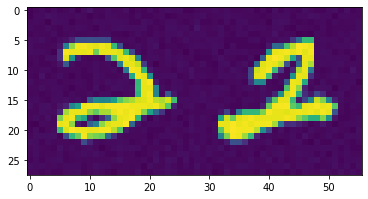

tensor(2) 0



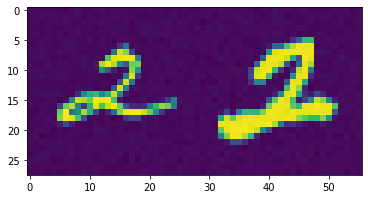

tensor(2) 1



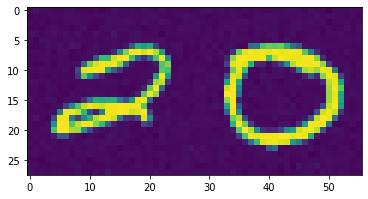

tensor(2) 2



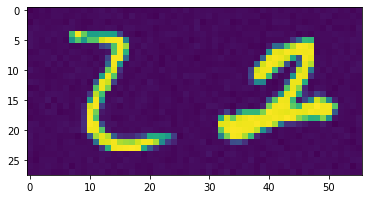

tensor(2) 3



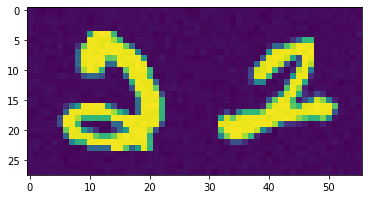

tensor(2) 4



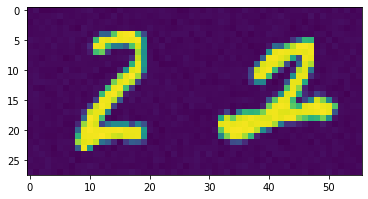

tensor(2) 5



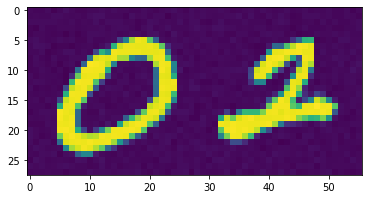

tensor(0) 6



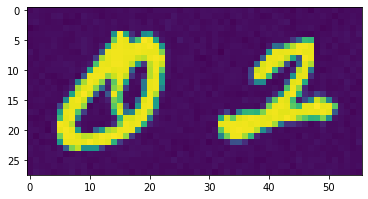

tensor(0) 7



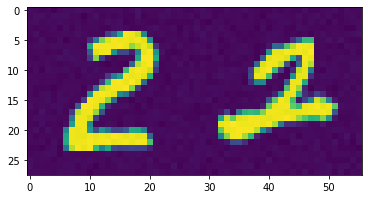

tensor(2) 8



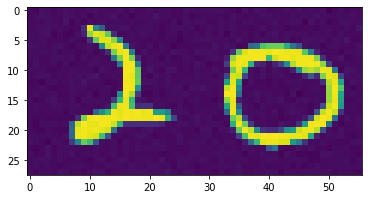

tensor(2) 9



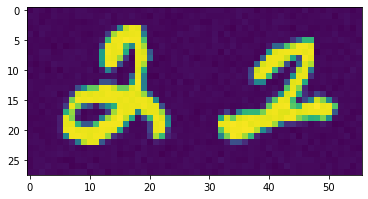

tensor(2) 10



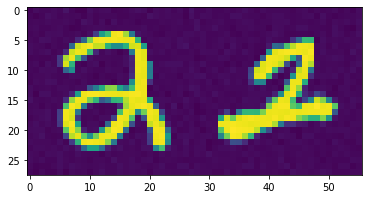

tensor(2) 11



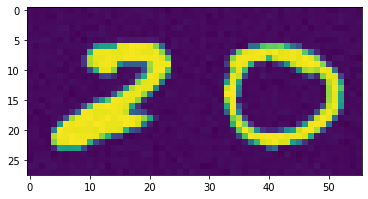

tensor(2) 12



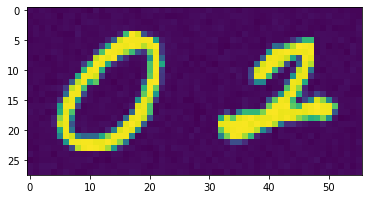

tensor(0) 13



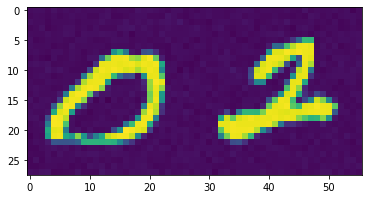

tensor(0) 14



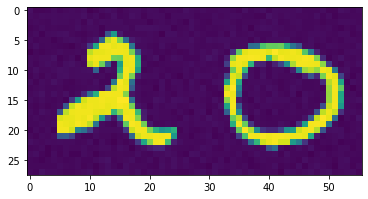

tensor(2) 15



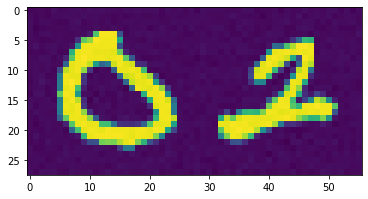

tensor(0) 16



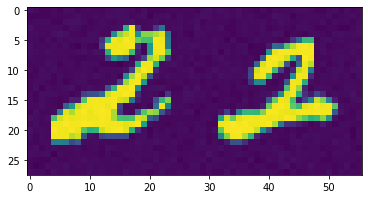

tensor(2) 17



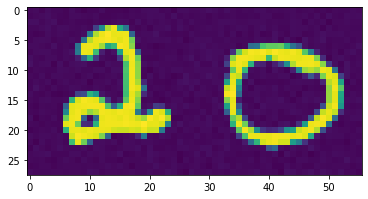

tensor(2) 18



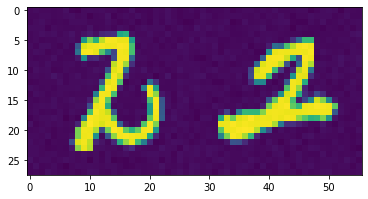

tensor(2) 19



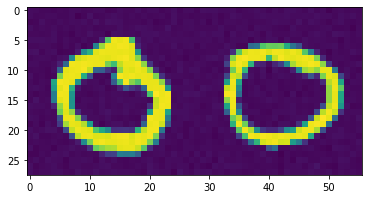

tensor(0) 20



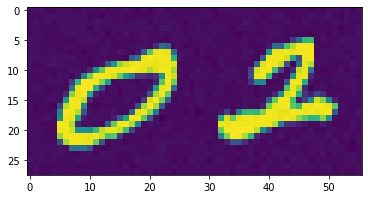

tensor(0) 21



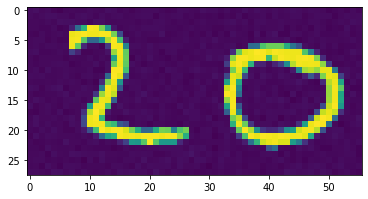

tensor(2) 22



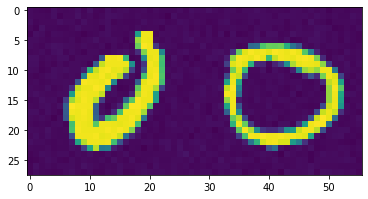

tensor(0) 23



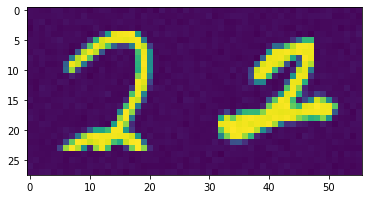

tensor(2) 24



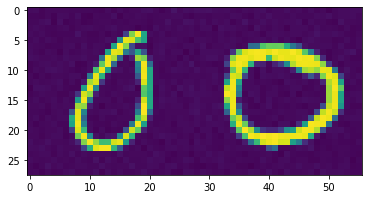

tensor(0) 25



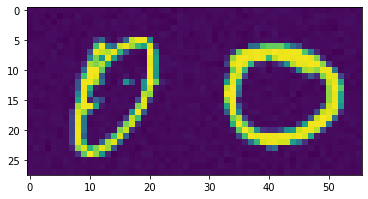

tensor(0) 26



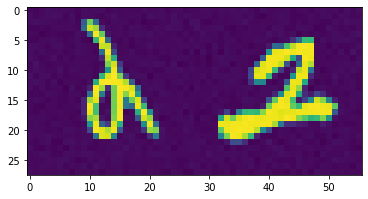

tensor(2) 27



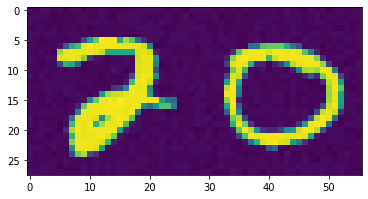

tensor(2) 28



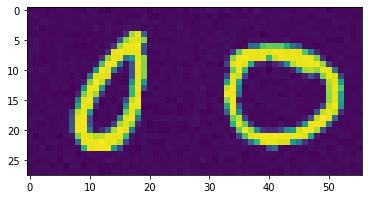

tensor(0) 29



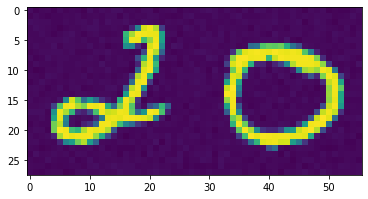

tensor(2) 30



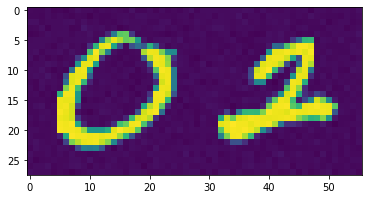

tensor(0) 31



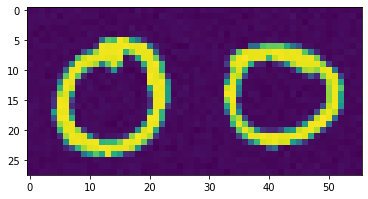

tensor(0) 32



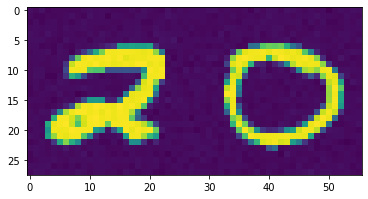

tensor(2) 33



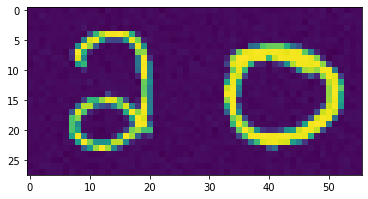

tensor(2) 34



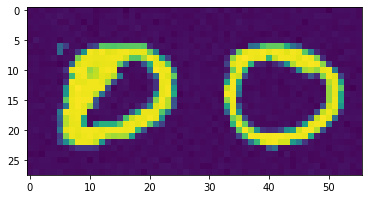

tensor(0) 35



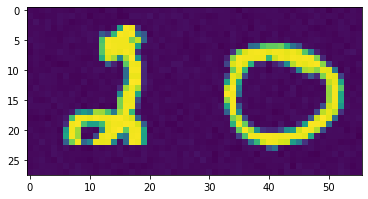

tensor(2) 36



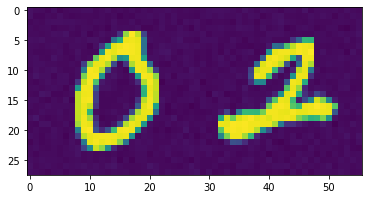

tensor(0) 37



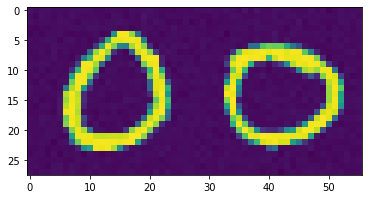

tensor(0) 38



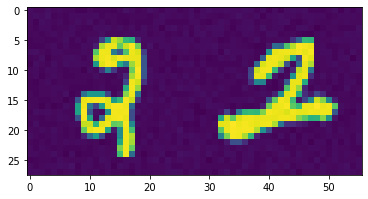

tensor(2) 39



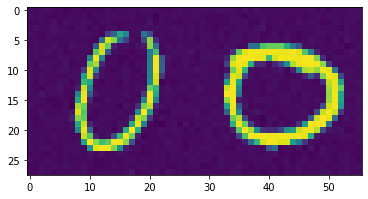

tensor(0) 40



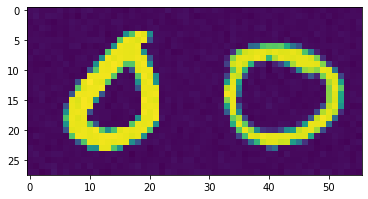

tensor(0) 41



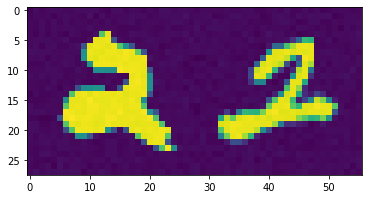

tensor(2) 42



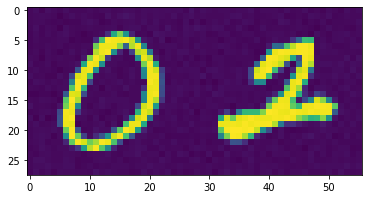

tensor(0) 43



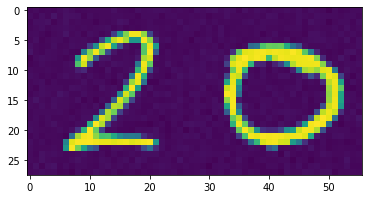

tensor(2) 44



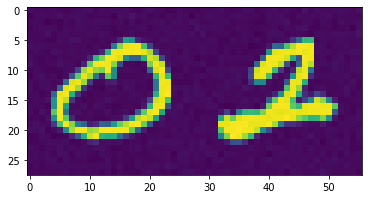

tensor(0) 45



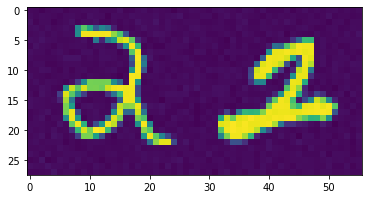

tensor(2) 46



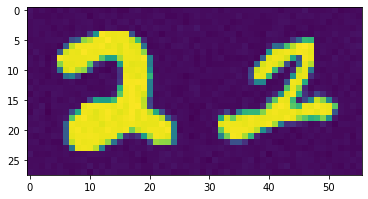

tensor(2) 47



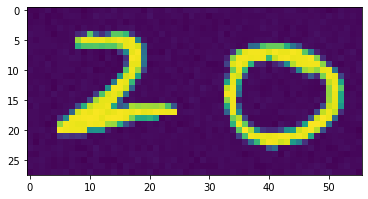

tensor(2) 48



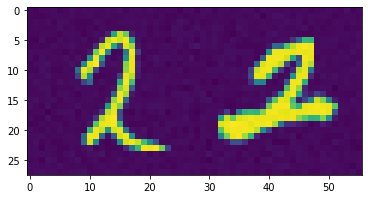

tensor(2) 49



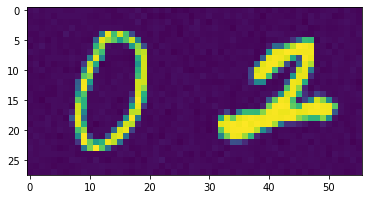

tensor(0) 50



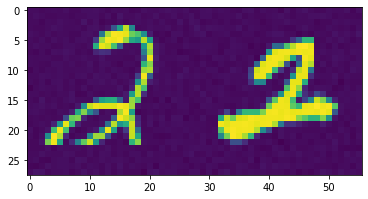

tensor(2) 51



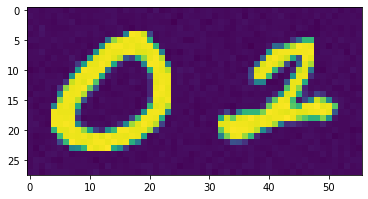

tensor(0) 52



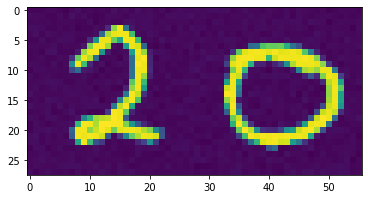

tensor(2) 53



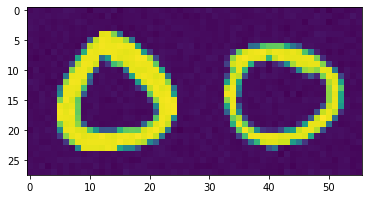

tensor(0) 54



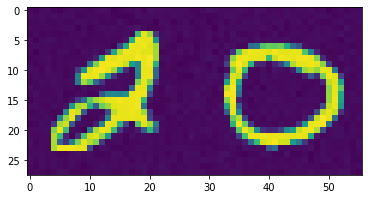

tensor(2) 55



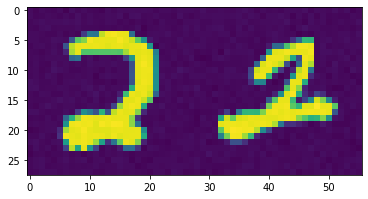

tensor(2) 56



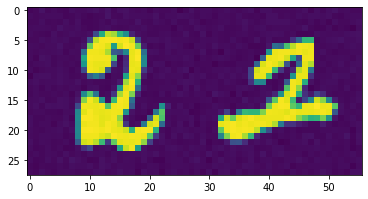

tensor(2) 57



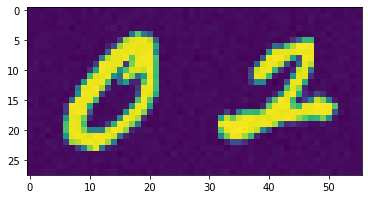

tensor(0) 58



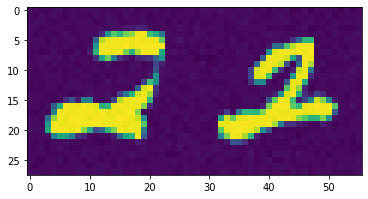

tensor(2) 59



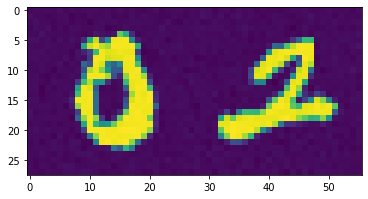

tensor(0) 60



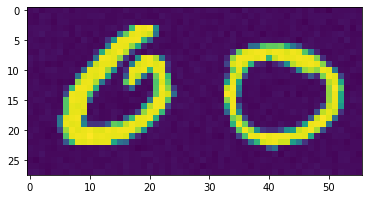

tensor(0) 61



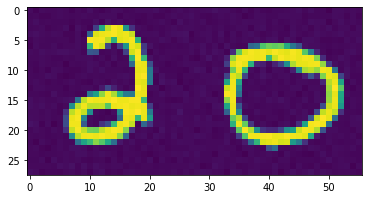

tensor(2) 62



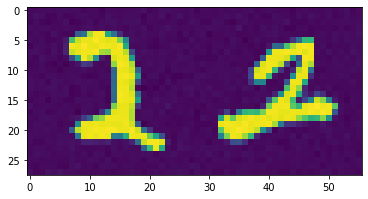

tensor(2) 63



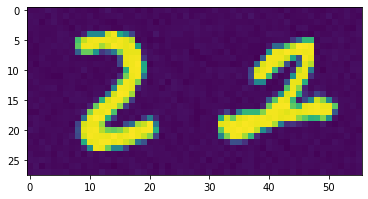

tensor(2) 64



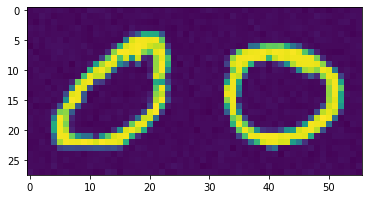

tensor(0) 65



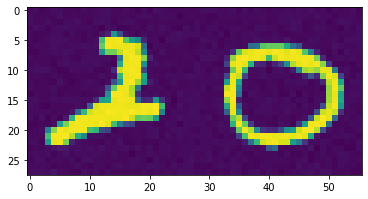

tensor(2) 66



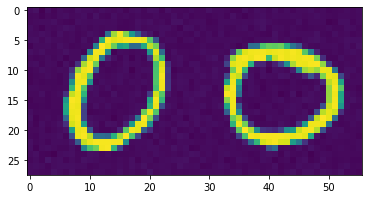

tensor(0) 67



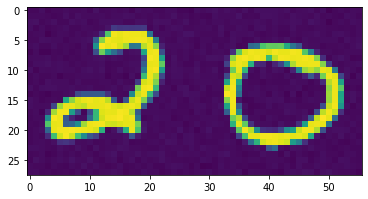

tensor(2) 68



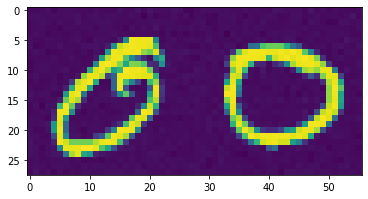

tensor(0) 69



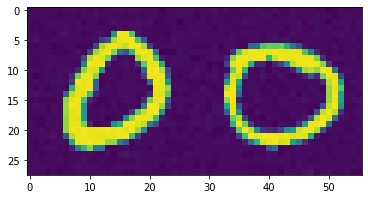

tensor(0) 70



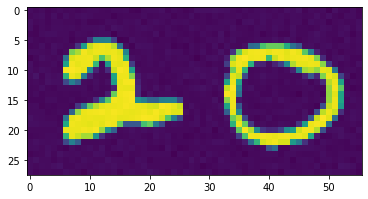

tensor(2) 71



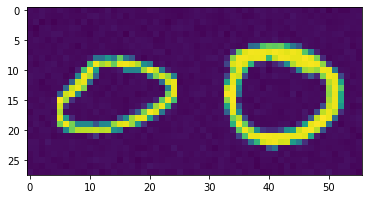

tensor(0) 72



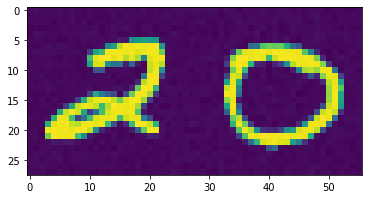

tensor(2) 73



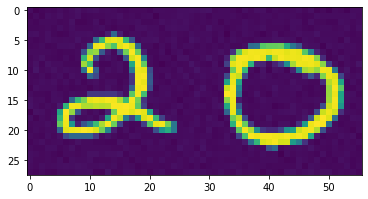

tensor(2) 74



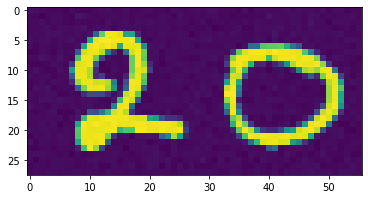

tensor(2) 75



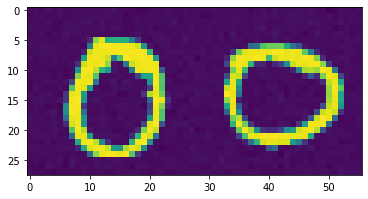

tensor(0) 76



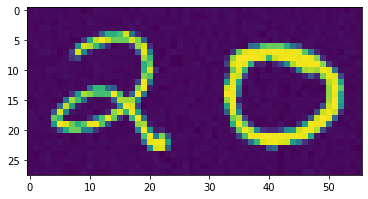

tensor(2) 77



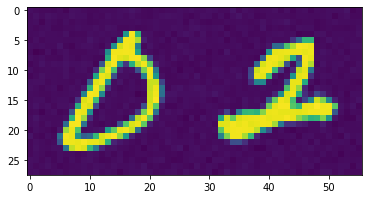

tensor(0) 78



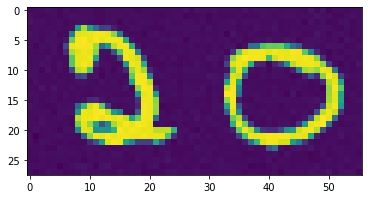

tensor(2) 79



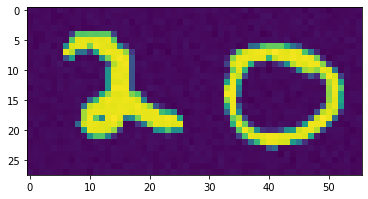

tensor(2) 80



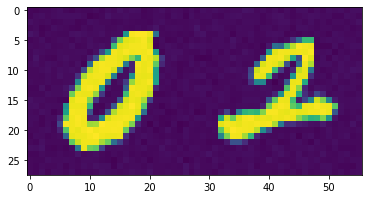

tensor(0) 81



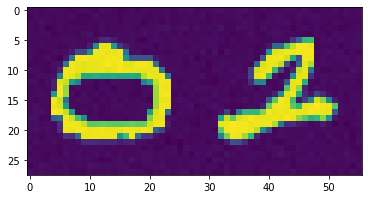

tensor(0) 82



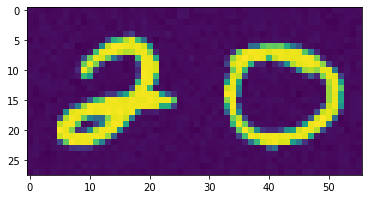

tensor(2) 83



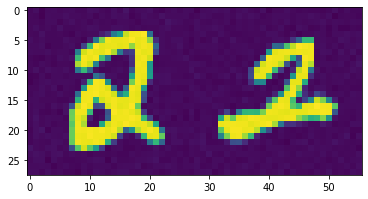

tensor(2) 84



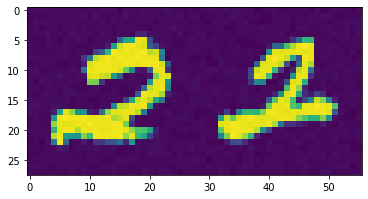

tensor(2) 85



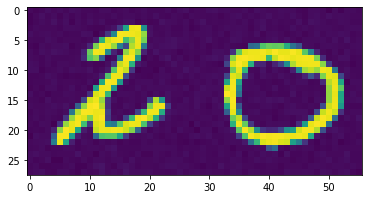

tensor(2) 86



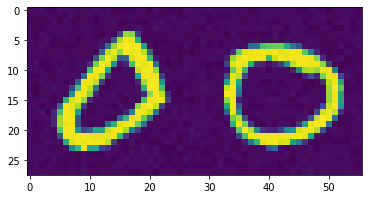

tensor(0) 87



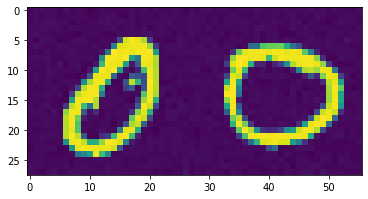

tensor(0) 88



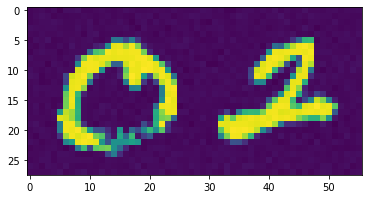

tensor(0) 89



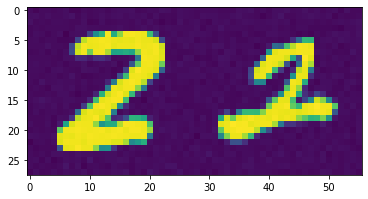

tensor(2) 90



KeyboardInterrupt: ignored

In [245]:
import matplotlib.pyplot as plt

Y_unlabeled = net(torch.Tensor(X_val))
y_u = torch.argmax(Y_unlabeled, axis=1)

for i in range(100):
    plt.imshow(X_val[i, 0])
    plt.show()
    print(y_u[i], i)
    #print(y_labeled[i], i)
    print("")

In [246]:
#net.train()
##with torch.no_grad():
  #  y_pred = net(X_test)

pred = y_u

pred = pred.numpy()
df = pd.DataFrame(pred)
df.to_csv("02_mnist_constant_image.csv", header=False, index=False)